 Load the dataset into python environment

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/titanic_dataset .csv')

Do all the necessary pre-processing steps

In [3]:
import numpy as np

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

filling missing age with its mean

In [5]:
df['Age']=df['Age'].fillna(np.mean(df['Age']))

removing missing values from embarked as its only 2

In [6]:
df.dropna(subset=['Embarked'],inplace=True)

filling missing cabin values with its mode

In [7]:
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace=True)

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
import seaborn as sns

<Axes: ylabel='Fare'>

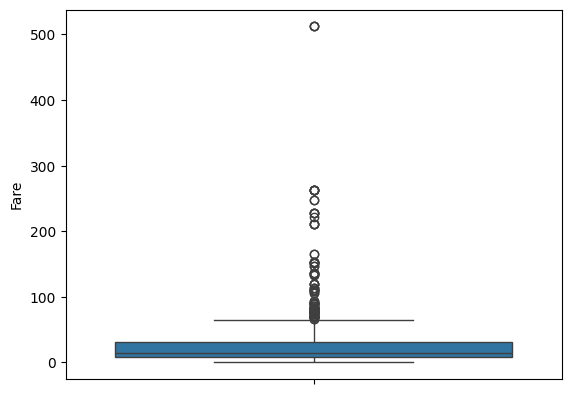

In [12]:
sns.boxplot(df['Fare'])

there are outliers in fare

In [13]:
Q1=df['Fare'].quantile(0.25)

In [14]:
Q3=df['Fare'].quantile(0.75)

In [15]:
IQR=Q3-Q1

In [16]:
low_lim=Q1-1.5*IQR

In [17]:
up_lim=Q3+1.5*IQR

In [18]:


df['Fare_outlier'] = (df['Fare'] < low_lim) | (df['Fare'] > up_lim)

In [19]:
print(low_lim)

-26.7605


In [20]:
print(up_lim)

65.6563


In [21]:
df = df[~df['Fare_outlier']]


In [22]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fare_outlier'],
      dtype='object')

<Axes: ylabel='Fare'>

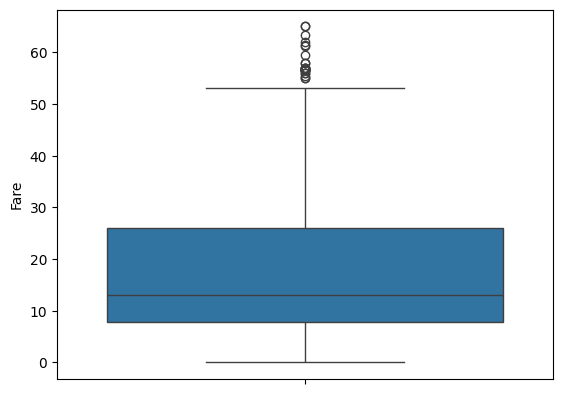

In [23]:
sns.boxplot(df['Fare'])

In [24]:
df['Fare'].describe()

count    775.000000
mean      17.822091
std       13.578085
min        0.000000
25%        7.895800
50%       13.000000
75%       26.000000
max       65.000000
Name: Fare, dtype: float64

In [25]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,775.000000,775.000000,775.00000,775.000000,775.000000,775.000000,775.000000
mean,445.806452,0.339355,2.48000,29.103880,0.437419,0.340645,17.822091
std,260.116285,0.473796,0.73439,12.779988,0.899838,0.785914,13.578085
min,1.000000,0.000000,1.00000,0.420000,0.000000,0.000000,0.000000
25%,213.500000,0.000000,2.00000,22.000000,0.000000,0.000000,7.895800
50%,450.000000,0.000000,3.00000,29.699118,0.000000,0.000000,13.000000
75%,670.500000,1.000000,3.00000,34.000000,1.000000,0.000000,26.000000
max,891.000000,1.000000,3.00000,80.000000,5.000000,6.000000,65.000000


outliers in age

<Axes: ylabel='Age'>

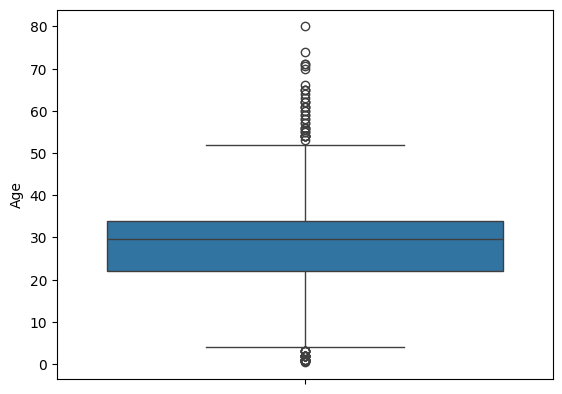

In [26]:
sns.boxplot(df['Age'])

In [27]:
Q1=df['Age'].quantile(0.25)

In [28]:
Q3=df['Age'].quantile(0.75)

In [29]:
IQR=Q3-Q1

In [30]:
low_lim=Q1-1.5*IQR

In [31]:
up_lim=Q3+1.5*IQR

In [32]:
df['Age_outlier'] = (df['Age'] < low_lim) | (df['Age'] > up_lim)

In [33]:
df = df[~df['Age_outlier']]

<Axes: ylabel='Age'>

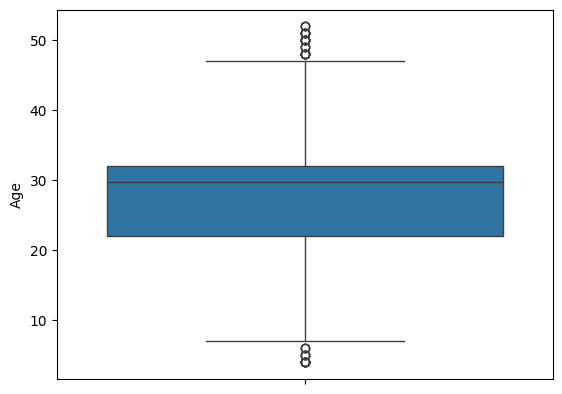

In [34]:
sns.boxplot(df['Age'])

 Create kNN and SVM models

In [35]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fare_outlier',
       'Age_outlier'],
      dtype='object')

In [36]:
df=df.drop(['Age_outlier','Fare_outlier'],axis=1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  708 non-null    int64  
 1   Survived     708 non-null    int64  
 2   Pclass       708 non-null    int64  
 3   Name         708 non-null    object 
 4   Sex          708 non-null    object 
 5   Age          708 non-null    float64
 6   SibSp        708 non-null    int64  
 7   Parch        708 non-null    int64  
 8   Ticket       708 non-null    object 
 9   Fare         708 non-null    float64
 10  Cabin        708 non-null    object 
 11  Embarked     708 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 71.9+ KB


In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,B96 B98,Q


In [39]:
df=df.drop(['Name'],axis=1)

finding correlation

<Axes: >

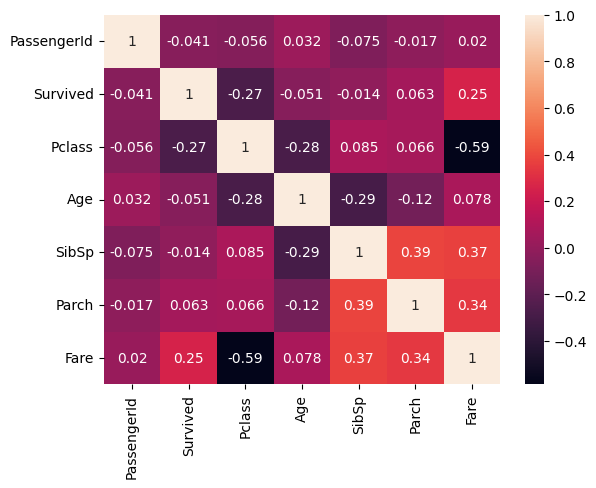

In [40]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix,annot=True)

pclass and fare have high correlation with survival

finding relations with object dtype

<Axes: xlabel='Sex', ylabel='Survived'>

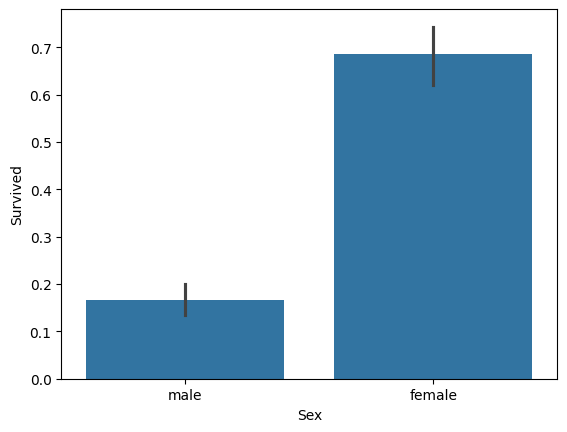

In [41]:
sns.barplot(data=df,x='Sex',y='Survived')

<Axes: xlabel='count', ylabel='Embarked'>

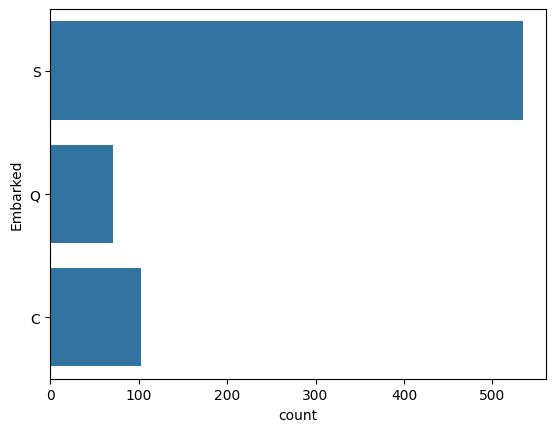

In [42]:
sns.countplot(df['Embarked'])

<Axes: xlabel='Embarked', ylabel='Survived'>

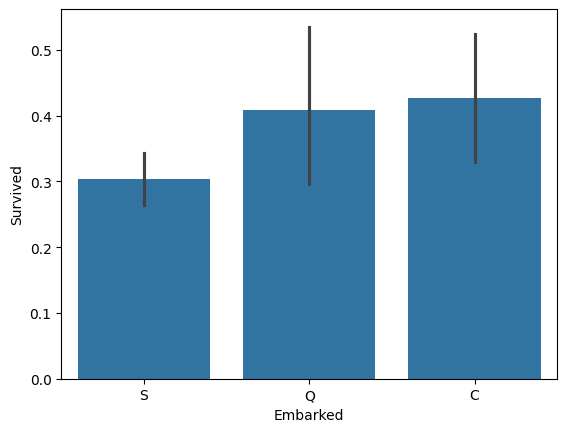

In [43]:
sns.barplot(data=df,x='Embarked',y='Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

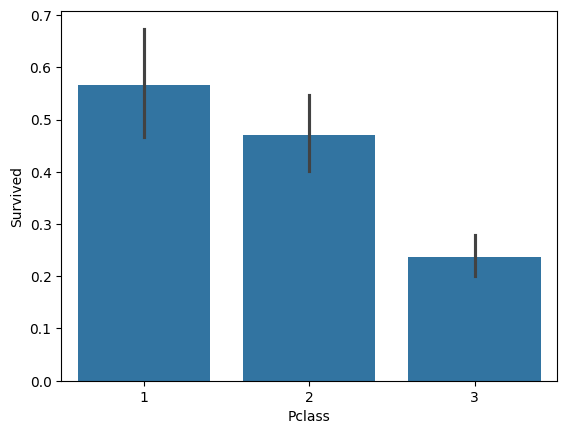

In [44]:
sns.barplot(data=df,x='Pclass',y='Survived')

In [45]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [46]:
df=df.drop(['PassengerId','Age','SibSp','Parch','Ticket','Cabin'],axis=1)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  708 non-null    int64  
 1   Pclass    708 non-null    int64  
 2   Sex       708 non-null    object 
 3   Fare      708 non-null    float64
 4   Embarked  708 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 33.2+ KB


In [48]:
from sklearn import preprocessing

converting object to int

In [49]:
encoder=preprocessing.LabelEncoder()

In [50]:
df['Embarked']=encoder.fit_transform(df['Embarked'])

In [51]:
df['Sex']=encoder.fit_transform(df['Sex'])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  708 non-null    int64  
 1   Pclass    708 non-null    int64  
 2   Sex       708 non-null    int64  
 3   Fare      708 non-null    float64
 4   Embarked  708 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 33.2 KB


splitting to train and test

In [53]:
X=df.drop(['Survived'],axis=1)

In [54]:
y=df['Survived']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler=StandardScaler()

In [59]:
X_train=scaler.fit_transform(X_train)

In [60]:
X_test=scaler.fit_transform(X_test)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
from sklearn import metrics

In [63]:
k_r=range(1,10)
scores=[]
for k in k_r:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  scores.append(metrics.accuracy_score(y_test,y_pred))

In [64]:
print(scores)

[0.795774647887324, 0.7746478873239436, 0.8098591549295775, 0.8098591549295775, 0.852112676056338, 0.823943661971831, 0.8450704225352113, 0.8380281690140845, 0.852112676056338]


In [65]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'accuracy')

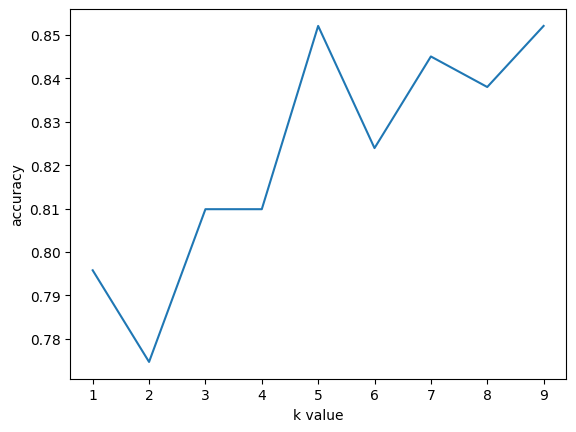

In [66]:
plt.plot(k_r,scores)
plt.xlabel('k value')
plt.ylabel('accuracy')

In [67]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.852112676056338


In [68]:
from sklearn.svm import SVC

In [77]:
model=SVC(kernel='linear')

In [72]:
model.fit(X_train,y_train)

SVC()

In [74]:
y_pred=model.predict(X_test)

In [75]:
print(metrics.accuracy_score(y_test,y_pred))

0.8169014084507042


 Do k-fold and stratified stratified k-fold cross validation techniques and find the
average accuracy score of the models

In [78]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [79]:
kf = StratifiedKFold(n_splits=5)

In [81]:
knn_scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy')
print(f"kNN Accuracy: {knn_scores.mean()}")

kNN Accuracy: 0.7809812140971899


In [82]:
svm_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
print(f"SVM Accuracy: {svm_scores.mean()}")

SVM Accuracy: 0.7897531439217513
